# A simple Perceptron in NumPy

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [74]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)

In [75]:
y=(y*2-1) #scale true lables from [0,1] to [-1,1
print(y)

[-1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1]


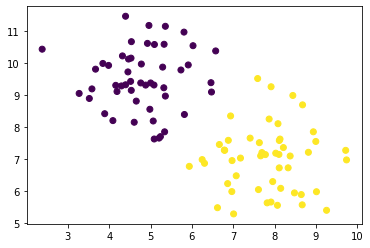

In [76]:
plt.scatter(X[:,0],X[:,1],c=y)

## Parameterize the classifier hyper-plane
* find offset $b$ and slope $w$

In [77]:
#helper function to find parameters
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


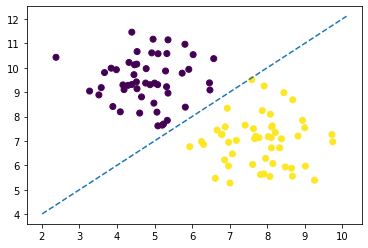

In [78]:
plt.scatter(X[:,0],X[:,1],c=y)
abline(1,2)

In [80]:
#set parameter
b=2
w=np.array([1,-1]) #norm=1 would be ~0.70... but 0.5 works fine

In [81]:
w.dot(np.array([1,1]))#check if othorgonal

0

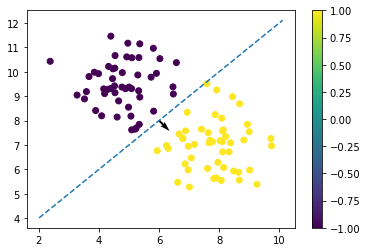

In [82]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
abline(1,2)
plt.quiver(6,8,w[0],w[1])# plot normal vector

### Classify samples via $sgn(wx+b)$

### classify single sample

In [83]:
w.dot(X[1,:].T)+b

3.0959328520553226

In [84]:
#or
X[1,:].dot(w)+b

3.0959328520553226

In [85]:
i=1
print (y[i],np.sign(w.dot(X[i,:].T)+b))
y[i]==np.sign(w.dot(X[i,:].T)+b)

1 1.0


True

### classify all samples at once
* change vector dot-product to vector matrix mult (matrix holds all samples)

In [86]:
w.dot(X.T)+b

array([-2.90290876,  3.09593285, -3.26469881,  1.99195084,  1.98700084,
       -3.78603446,  2.51619121,  1.44745726, -1.53798671, -3.13939865,
       -1.11711711,  3.15018956, -3.62142793, -4.13444079,  2.15440524,
        2.60549188,  0.66367176,  1.51331875,  4.26786268, -0.53006381,
        4.52651618,  2.57277535,  4.76710306,  3.61727886,  2.54474358,
       -1.79761541,  2.64842998, -3.15310771,  3.29164055,  0.08185766,
       -2.60940992, -3.36807128, -4.1360851 , -0.91796843, -0.50273506,
        1.46308513,  2.85454721, -3.2536752 , -2.91613006, -0.44085978,
       -2.0422952 ,  5.11106519,  1.30491739,  3.6127502 ,  3.57503171,
       -0.61322924, -4.2098632 , -2.5743285 , -2.51952185,  1.21882656,
        1.62615148, -3.7720238 , -2.60708144,  2.86368649, -0.45415098,
        4.54950857, -3.48096094,  3.39867997,  2.99297952, -1.60263772,
       -2.22333908,  2.12922038, -3.65242114,  1.17442632,  5.04596156,
        2.02910112,  4.77829175, -3.60411892,  1.27456657,  2.97

In [87]:
np.sign(w.dot(X.T)+b)

array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.])

In [88]:
#check result
y==np.sign(w.dot(X.T)+b)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [89]:
y==np.sign(X.dot(w.T)+b)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [90]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w.dot(X.T)+b))
print(pos)

(array([], dtype=int64),)


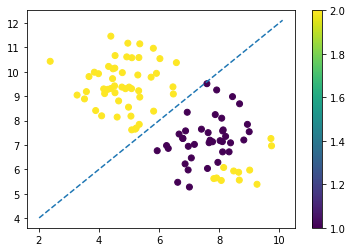

In [72]:
y_test=y
y_test[pos]=2
plt.scatter(X[:,0],X[:,1],c=y_test)#set color 
plt.colorbar()
abline(1,2)